# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

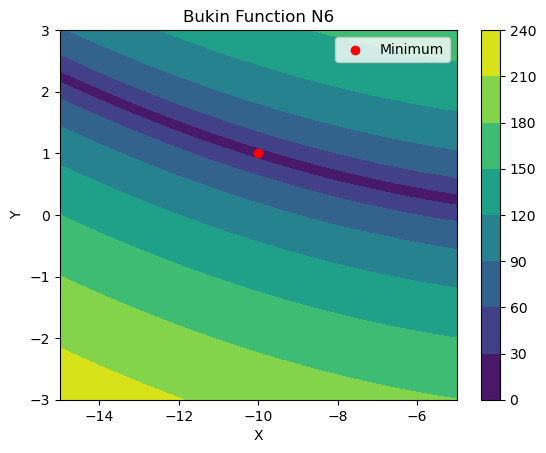

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x ** 2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

# Generate x and y coordinates for the function
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin_function(X, Y)

# Plot the function contour
plt.figure()
contour = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bukin Function N6')

# Plot the minimum point
plt.scatter(-10, 1, color='red', label='Minimum')

# Show the plot
plt.legend()
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

def bukin_function(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x ** 2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

def generate_neighbour(current_state):
    # Make small modifications to the current state
    eps = 0.0001
    neighbour1 = [current_state[0] + eps, current_state[1]]
    neighbour2 = [current_state[0], current_state[1] + eps]
    neighbour3 = [current_state[0] - eps, current_state[1]]
    neighbour4 = [current_state[0], current_state[1] - eps]
    neighbour5 = [current_state[0] + eps, current_state[1] + eps]
    
    neighbour1_fitness = bukin_function(neighbour1[0], neighbour1[1])
    neighbour2_fitness = bukin_function(neighbour2[0], neighbour2[1])
    neighbour3_fitness = bukin_function(neighbour3[0], neighbour3[1])
    neighbour4_fitness = bukin_function(neighbour4[0], neighbour4[1])
    neighbour5_fitness = bukin_function(neighbour5[0], neighbour5[1])
    
    best_fitness = neighbour1_fitness
    best_neighbour = neighbour1
    
    if best_fitness < neighbour2_fitness:
        best_fitness = neighbour2_fitness
        best_neighbour = neighbour2
    
    if best_fitness < neighbour3_fitness:
        best_fitness = neighbour3_fitness
        best_neighbour = neighbour3
    
    if best_fitness < neighbour4_fitness:
        best_fitness = neighbour4_fitness
        best_neighbour = neighbour4
        
    if best_fitness < neighbour4_fitness:
        best_fitness = neighbour4_fitness
        best_neighbour = neighbour4
    
    if best_fitness < neighbour5_fitness:
        best_fitness = neighbour5_fitness
        best_neighbour = neighbour5
        
    return best_neighbour


def hill_climbing():
    # Def. the initial state
    initial_state = [random.uniform(-15, -5), random.uniform(-3, 3)]
    current_state = initial_state
    current_fitness = bukin_function(current_state[0], current_state[1])
    
    # Def. a proper stop criterion
    max_iterations = 1000
    iterations = 0
    
    while iterations < max_iterations:
        # Generate a neighboring state
        neighbour = generate_neighbour(current_state)
        neighbour_fitness = bukin_function(neighbour[0], neighbour[1])
        
        # If the neighbor has better fitness, update the current state
        if neighbour_fitness < current_fitness:
            current_state = neighbour
            current_fitness = neighbour_fitness
        
        iterations += 1
    
    return initial_state, current_state

# Run the Hill Climbing algorithm
initial_point, minimum_point = hill_climbing()
minimum_value = bukin_function(minimum_point[0], minimum_point[1])
initial_value = bukin_function(initial_point[0], initial_point[1])
print("Initial point:", initial_point)
print("Initial value:", initial_value)
print("Minimum point:", minimum_point)
print("Minimum value:", minimum_value)

Initial point: [-8.05844527041922, -2.9155033863766384]
Initial value: 188.82854636834634
Minimum point: [-8.05844527041922, -2.9155033863766384]
Minimum value: 188.82854636834634


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [33]:
import random

# Define the knapsack problem
class KnapsackProblem:
    def __init__(self, values, weights, max_weight):
        self.values = values
        self.weights = weights
        self.max_weight = max_weight
    
    """
    solution - list of binary, if the item is selected or not
    return: calculates the total value of the selected items
    """
    def evaluate(self, solution):
        total_value = sum(val for val, selected in zip(self.values, solution) if selected)
        total_weight = sum(weight for weight, selected in zip(self.weights, solution) if selected)
        return total_value if total_weight <= self.max_weight else 0
    
    """
    Generates neighboring solutions from a given solution.
    solution (list): current solution as a binary list. 1 if selected, 0 otherwise.
    return:list: A list of neighboring solutions, where each neighbor is obtained by flipping a single item in
              the solution from selected to unselected, or vice versa, at each position in the solution array.
    """
    def get_neighbors(self, solution):
        neighbors = []
        for i in range(len(solution)):
            neighbor = list(solution)
            neighbor[i] = 1 - neighbor[i]  # Switch 0 to 1 or 1 to 0
            neighbors.append(neighbor)
        return neighbors

    
def hill_climbing(knapsack):
    n = len(knapsack.values)
    current_solution = [0] * n  # Start with an empty solution
    current_fitness = knapsack.evaluate(current_solution)

    while True:
        neighbors = knapsack.get_neighbors(current_solution)
        best_neighbor = current_solution
        best_fitness = current_fitness

        for neighbor in neighbors:
            neighbor_fitness = knapsack.evaluate(neighbor)
            if neighbor_fitness > best_fitness:
                best_neighbor = neighbor
                best_fitness = neighbor_fitness

        if best_fitness <= current_fitness:
            # No better solution found, stop the algorithm
            break

        current_solution = best_neighbor
        current_fitness = best_fitness

    return current_solution


# Example usage
values = [10, 4, 8, 5, 3]
weights = [3, 2, 4, 1, 2]
max_weight = 8

knapsack = KnapsackProblem(values, weights, max_weight)
solution = hill_climbing(knapsack)

print("Selected items:", [i for i, selected in enumerate(solution) if selected])
print("Total value:", knapsack.evaluate(solution))


Selected items: [0, 2, 3]
Total value: 23



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [30]:
import random

# Define the knapsack problem
class KnapsackProblem:
    def __init__(self, values, weights, max_weight):
        self.values = values
        self.weights = weights
        self.max_weight = max_weight

    """
    solution - list of binary, if the item is selected or not
    return: calculates the total value of the selected items
    """
    def evaluate(self, solution):
        total_value = sum(val for val, selected in zip(self.values, solution) if selected)
        total_weight = sum(weight for weight, selected in zip(self.weights, solution) if selected)
        return total_value if total_weight <= self.max_weight else 0
    
    """
    Generates neighboring solutions from a given solution.
    solution (list): current solution as a binary list. 1 if selected, 0 otherwise.
    return:list: A list of neighboring solutions, where each neighbor is obtained by flipping a single item in
              the solution from selected to unselected, or vice versa, at each position in the solution array.
    """
    def get_neighbors(self, solution):
        neighbors = []
        for i in range(len(solution)):
            neighbor = list(solution)
            neighbor[i] = 1 - neighbor[i]  # Switch 0 to 1 or 1 to 0
            neighbors.append(neighbor)
        return neighbors

# Hill Climbing algorithm with random restarts
def hill_climbing_with_restarts(knapsack, num_restarts):
    best_solution = None
    best_fitness = 0

    for _ in range(num_restarts):
        n = len(knapsack.values)
        current_solution = [random.randint(0, 1) for _ in range(n)]  # Random initial solution
        current_fitness = knapsack.evaluate(current_solution)

        while True:
            neighbors = knapsack.get_neighbors(current_solution)
            best_neighbor = max(neighbors, key=knapsack.evaluate)
            best_fitness = knapsack.evaluate(best_neighbor)

            if best_fitness <= current_fitness:
                # No better solution found, stop the algorithm
                break

            current_solution = best_neighbor
            current_fitness = best_fitness

        if current_fitness > best_fitness:
            # Update the best solution if a better one is found
            best_solution = current_solution
            best_fitness = current_fitness

    return best_solution

# Example usage
values = [10, 4, 8, 5, 3]
weights = [3, 2, 4, 1, 2]
max_weight = 8
num_restarts = 10

knapsack = KnapsackProblem(values, weights, max_weight)
solution = hill_climbing_with_restarts(knapsack, num_restarts)

print("Selected items:", [i for i, selected in enumerate(solution) if selected])
print("Total value:", knapsack.evaluate(solution))


Selected items: [0, 2, 3]
Total value: 23
